In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run ../code/00_Functions.ipynb

In [3]:
props = pd.read_csv('../datasets/train.csv')

In [29]:
y = props['SalePrice']

In [30]:
non_numerics = props.select_dtypes(exclude = np.number)

In [31]:
props_dummy = pd.get_dummies(props, columns = non_numerics.columns, drop_first = True)

In [4]:
replace_NaN_with_NA(props, ['Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fence'])

In [5]:
binarize_to_most_common_str_val(props, [('Street', 'Paved Street'),
 ('Utilities', 'Has All Utilities'),
 ('Land Slope', 'Gentle Slope'),
 ('Central Air', None),
 ('Paved Drive', None)])

In [6]:
convert_num_to_cat(props, ['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond', 'Mo Sold'])

In [7]:
convert_years_to_ages(props, 2010, [
    ('Year Built', 'Years since built'),
    ('Year Remod/Add', 'Years since remodel'),
    ('Yr Sold', 'Years since last sold')
])

In [8]:
# features_to_use_list.remove('Overall Qual_10')


In [9]:
props.drop('PID', axis = 1 , inplace = True)

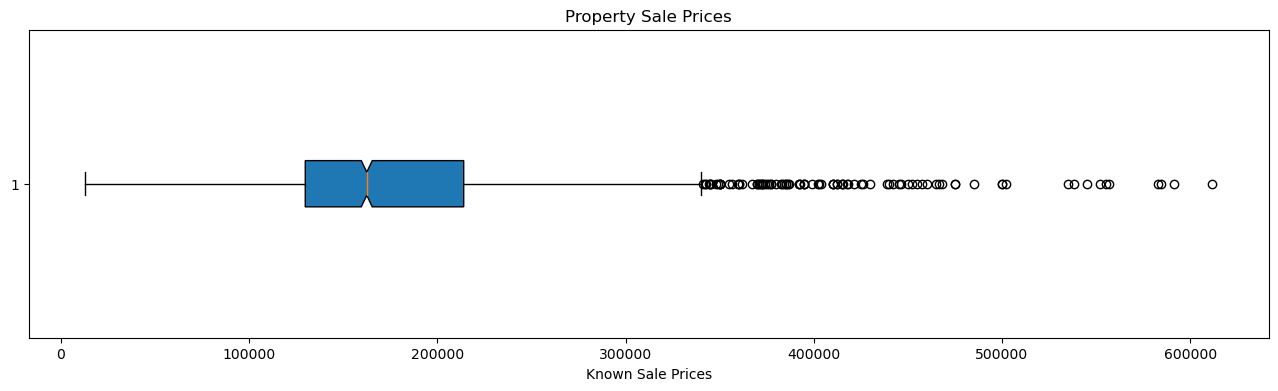

In [59]:
plt.figure(figsize=(16,4))
plt.boxplot(props['SalePrice'], vert = False, patch_artist=True, notch=True);
plt.title('Property Sale Prices')
plt.xlabel('Known Sale Prices')

plt.savefig('Known_Sale_Prices.png')

In [11]:
rooms = props.loc[:, ['Bedroom AbvGr', 'Full Bath', 'Half Bath']]

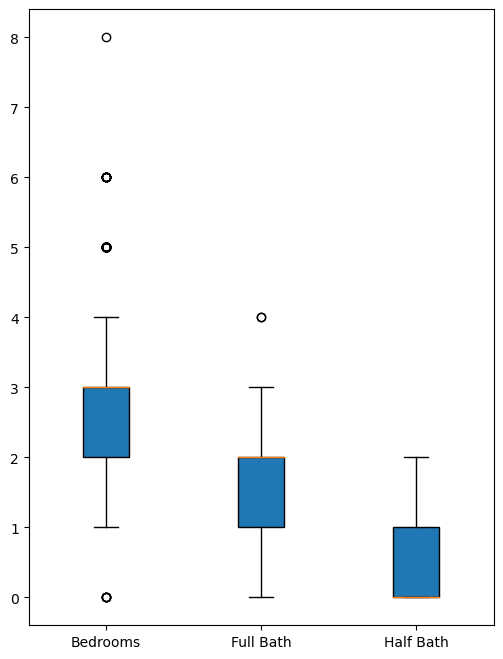

In [51]:
plt.figure(figsize=(6,8))
plt.boxplot(rooms, vert = True, labels = ['Bedrooms','Full Bath', 'Half Bath'], patch_artist=True)
plt.title('Properties by room makeup')


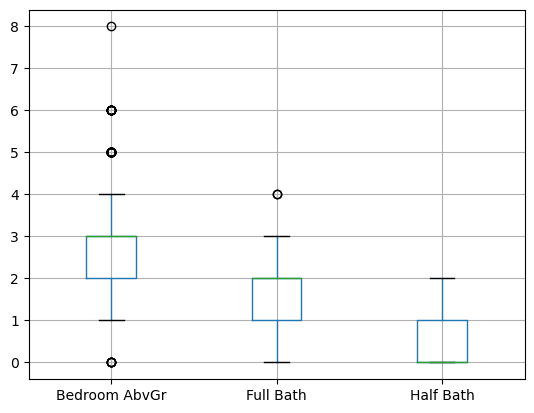

In [48]:
boxplot = rooms.boxplot()

In [36]:
props_dummy.corr(numeric_only = True)[['SalePrice']].sort_values( by = 'SalePrice', ascending = False ).tail(10)

,SalePrice
Overall Qual_5,-0.361012
Garage Type_Detchd,-0.370344
Mas Vnr Type_None,-0.424088
Garage Finish_Unf,-0.432220
Bsmt Qual_TA,-0.456979
Fireplace Qu_NA,-0.485858
Kitchen Qual_TA,-0.540860
Years since remodel,-0.550370
Years since built,-0.571849
Exter Qual_TA,-0.600362


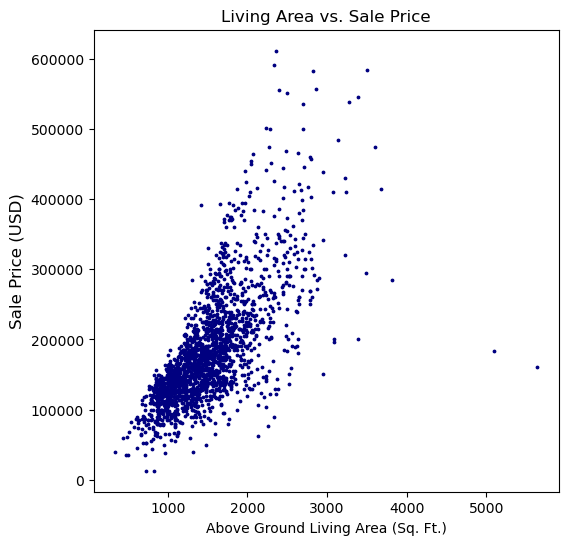

In [54]:
plt.figure(figsize=(6,6))
plt.scatter( x = props['Gr Liv Area'], y = y, s = 3, color = 'navy')
plt.title('Living Area vs. Sale Price')
plt.xlabel('Above Ground Living Area (Sq. Ft.)')
plt.ylabel('Sale Price (USD)', size = 12);

plt.savefig('Living_Area_Corr.png')

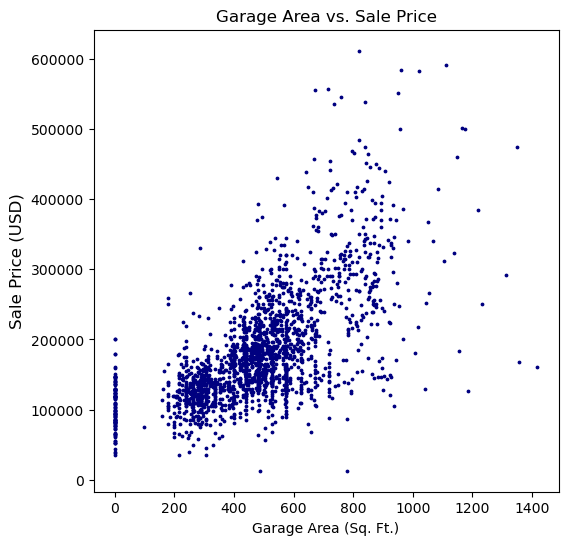

In [55]:
plt.figure(figsize=(6,6))
plt.scatter( x = props['Garage Area'], y = y, s = 3, color = 'navy')
plt.title('Garage Area vs. Sale Price')
plt.xlabel('Garage Area (Sq. Ft.)')
plt.ylabel('Sale Price (USD)', size = 12);

plt.savefig('Garage_Area_Corr.png')

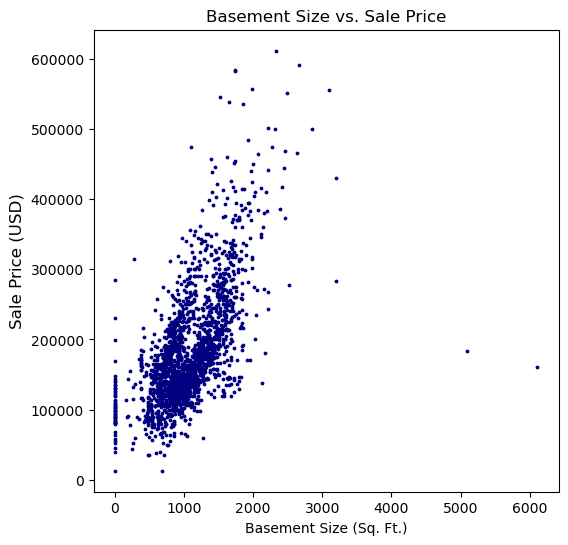

In [56]:
plt.figure(figsize=(6,6))
plt.scatter( x = props['Total Bsmt SF'], y = y, s = 3, color = 'navy')
plt.title('Basement Size vs. Sale Price')
plt.xlabel('Basement Size (Sq. Ft.)')
plt.ylabel('Sale Price (USD)', size = 12);

plt.savefig('Basement_Size_Corr.png')

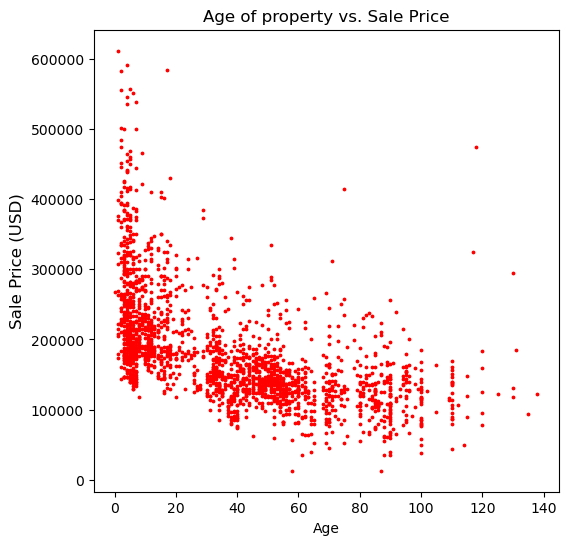

In [57]:
plt.figure(figsize=(6,6))
plt.scatter( x = props_dummy['Years since built'], y = y, s = 3, color = 'red')
plt.title('Age of property vs. Sale Price')
plt.xlabel('Age')
plt.ylabel('Sale Price (USD)', size = 12);

plt.savefig('Age_Corr.png')

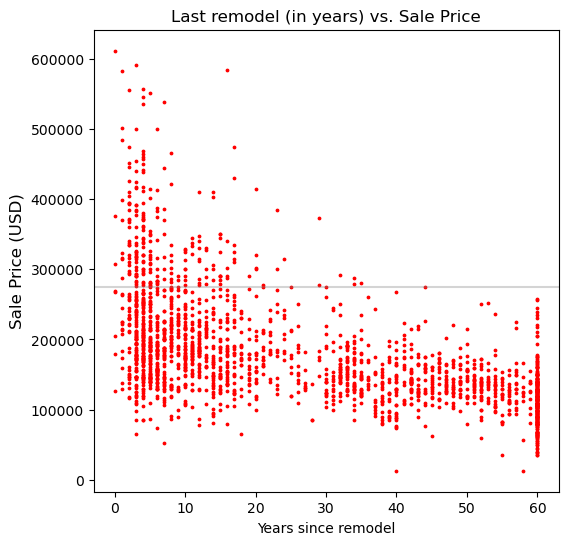

In [58]:
plt.figure(figsize=(6,6))
plt.scatter( x = props_dummy['Years since remodel'], y = y, s = 3, color = 'red')
plt.title('Last remodel (in years) vs. Sale Price')
plt.xlabel('Years since remodel')
plt.ylabel('Sale Price (USD)', size = 12)
plt.axhline(275000, color = 'grey', alpha = 1/3);

plt.savefig('Since_Remodel_Corr.png')